In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
columns = [col for col in pd.read_csv('/Volumes/thesis-data/main.csv', nrows=1).columns]

Reading in all the data causes the kernel to die, typically, so a small random sample is to be taken.

In [3]:
! wc -l /Volumes/thesis-data/main.csv

 2447476 /Volumes/thesis-data/main.csv


In [4]:
N = 2447476
s = 10000
skip = sorted(random.sample(range(1, N), N - s - 1))

In [5]:
x = {'ADM_MET': 'category', 'DIS_MET': 'category', 
    'MAIN_SPEC': 'object', 'NON_NHS_FLAG': 'category', 
    'OPCS_12': 'object', 'OPCS_13': 'object', 
    'DayofMainProc': 'category', 'SEX': 'category', 
    'consultant': 'object', 'end_ward': 'object', 
    'pasid': 'object', 'practice_code': 'category', 
    'procedure_code': 'category', 'site1': 'category', 
    'south_north': 'category', 'start_ward': 'object', 
    '100x': 'category', '10x': 'category', '5x': 'category', 
    '2x': 'category', 'ACTIVITY': 'category', 'C.DIFF': 'category', 
    'MRSA': 'category', 'Obese': 'category', 'NON_NHS_FLG': 'category', 
    'SPECIALTY': 'category', 'ACUITY': 'category', 'SS_CODE': 'object', 
    'WIP_FLG': 'category', 'SPELL_FLG': 'object'}

primsec = [col for col in columns if col.endswith('Prim') or col.endswith('Sec') or col.endswith('.1')]
y = {col: 'category' for col in primsec}

dtype_dict = {**x, **y}

In [32]:
df = pd.read_csv('/Volumes/thesis-data/main.csv', 
                 parse_dates = ['Bench_Period', 'Period', 'ADMDATE', 
                                'DISCDATE', 'EPISODE_ST', 'EPISODE_END'], 
                 dtype=dtype_dict, skiprows=skip, low_memory=False)

In [33]:
df.index = df['PATIENT_ID']

In [34]:
num_cols = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
num_cols = [i for i in num_cols if i not in ['LOS', 'Age', 'MFFT_Delay_Days', 'OPCS_MAX_LEVEL', 'DIAG_NO', 'DOM_LEVEL', 'TH_TIME']]
scaled_df = df
scaled_df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()

In [35]:
desired = ['Age', 'LOS', 'CC_LOS', 'NetCost', 'COST', 'WARD', 'MED', 'PROS', 'CRIT']

In [36]:
diabetes = scaled_df[(scaled_df.DiabetesPrim == '1.0') | (scaled_df.DiabetesSec == '1.0')][desired].describe(percentiles=[.25, .5, .75, .95])
no_diabetes = scaled_df[(scaled_df.DiabetesPrim == '0.0') & (scaled_df.DiabetesSec == '0.0')][desired].describe(percentiles=[.25, .5, .75, .95])

pd.concat([diabetes, no_diabetes], keys=['DIABETES (Primary or Secondary)', 'NO DIABETES'], axis=1)

DIABETES (Primary or Secondary)                                         \
                                  Age          LOS       CC_LOS      NetCost   
count                     1031.000000  1031.000000  1031.000000  1031.000000   
mean                        69.466537     3.663434     0.010891     0.107007   
std                         15.790393     6.631508     0.841751     1.089970   
min                          6.000000     1.000000    -0.046686    -0.540516   
25%                         62.000000     1.000000    -0.046686    -0.443269   
50%                         72.000000     1.000000    -0.046686    -0.296311   
75%                         81.000000     4.000000    -0.046686     0.148913   
95%                         90.000000    15.000000    -0.046686     2.133724   
max                        100.000000    89.000000    24.504143    10.871172   

                                                                        \
              COST         WARD          MED         PROS         CRIT   
count  1031.000000  1031.000000  1031.000000  1031.000000  1031.000000   
mean      0.109409     0.115901     0.018998    -0.010917     0.053260   
std       1.218742     1.038422     1.150755     0.896811     1.645911   
min      -0.481469    -0.434735    -0.464617    -0.135900    -0.076319   
25%      -0.399737    -0.372034    -0.385989    -0.135900    -0.076319   
50%      -0.272415    -0.251067    -0.318844    -0.135900    -0.076319   
75%       0.127422     0.175107    -0.049641    -0.135900    -0.076319   
95%       1.914297     1.876231     1.554426    -0.077384    -0.076319   
max      18.167482    12.842436    20.963768    14.847107    43.619375   

       NO DIABETES                                                      \
               Age          LOS       CC_LOS      NetCost         COST   
count  8969.000000  8969.000000  8969.000000  8969.000000  8969.000000   
mean     51.648233     2.634965    -0.001252    -0.012301    -0.012577   
std      26.411659     6.061082     1.016647     0.988457     0.970997   
min       0.000000     1.000000    -0.046686    -0.578405    -0.513243   
25%      30.000000     1.000000    -0.046686    -0.452759    -0.407752   
50%      56.000000     1.000000    -0.046686    -0.334385    -0.307047   
75%      74.000000     2.000000    -0.046686     0.019993    -0.003958   
95%      88.000000    10.000000    -0.046686     1.511378     1.317188   
max     107.000000   170.000000    75.195759    21.994549    27.730715   

                                                           
              WARD          MED         PROS         CRIT  
count  8969.000000  8969.000000  8969.000000  8969.000000  
mean     -0.013323    -0.002184     0.001255    -0.006122  
std       0.994683     0.981237     1.011225     0.896360  
min      -0.434735    -0.464617    -0.135900    -0.076319  
25%      -0.419796    -0.393418    -0.135900    -0.076319  
50%      -0.287829    -0.302854    -0.135900    -0.076319  
75%      -0.053258     0.002244    -0.135900    -0.076319  
95%       1.391728     1.421567     0.097883    -0.076319  
max      29.471033    30.411648    33.561491    47.207702

In [37]:
trimmed_df = scaled_df[abs(scaled_df.LOS - scaled_df.LOS.mean()) <= 5 * scaled_df.LOS.std()]

There is a very large tail on this data for both lengths of stay and costs which is why the numerical attributes have been scaled and the data trimmed to the records with length of stay (LOS) that are within 5 standard deviations of the mean.

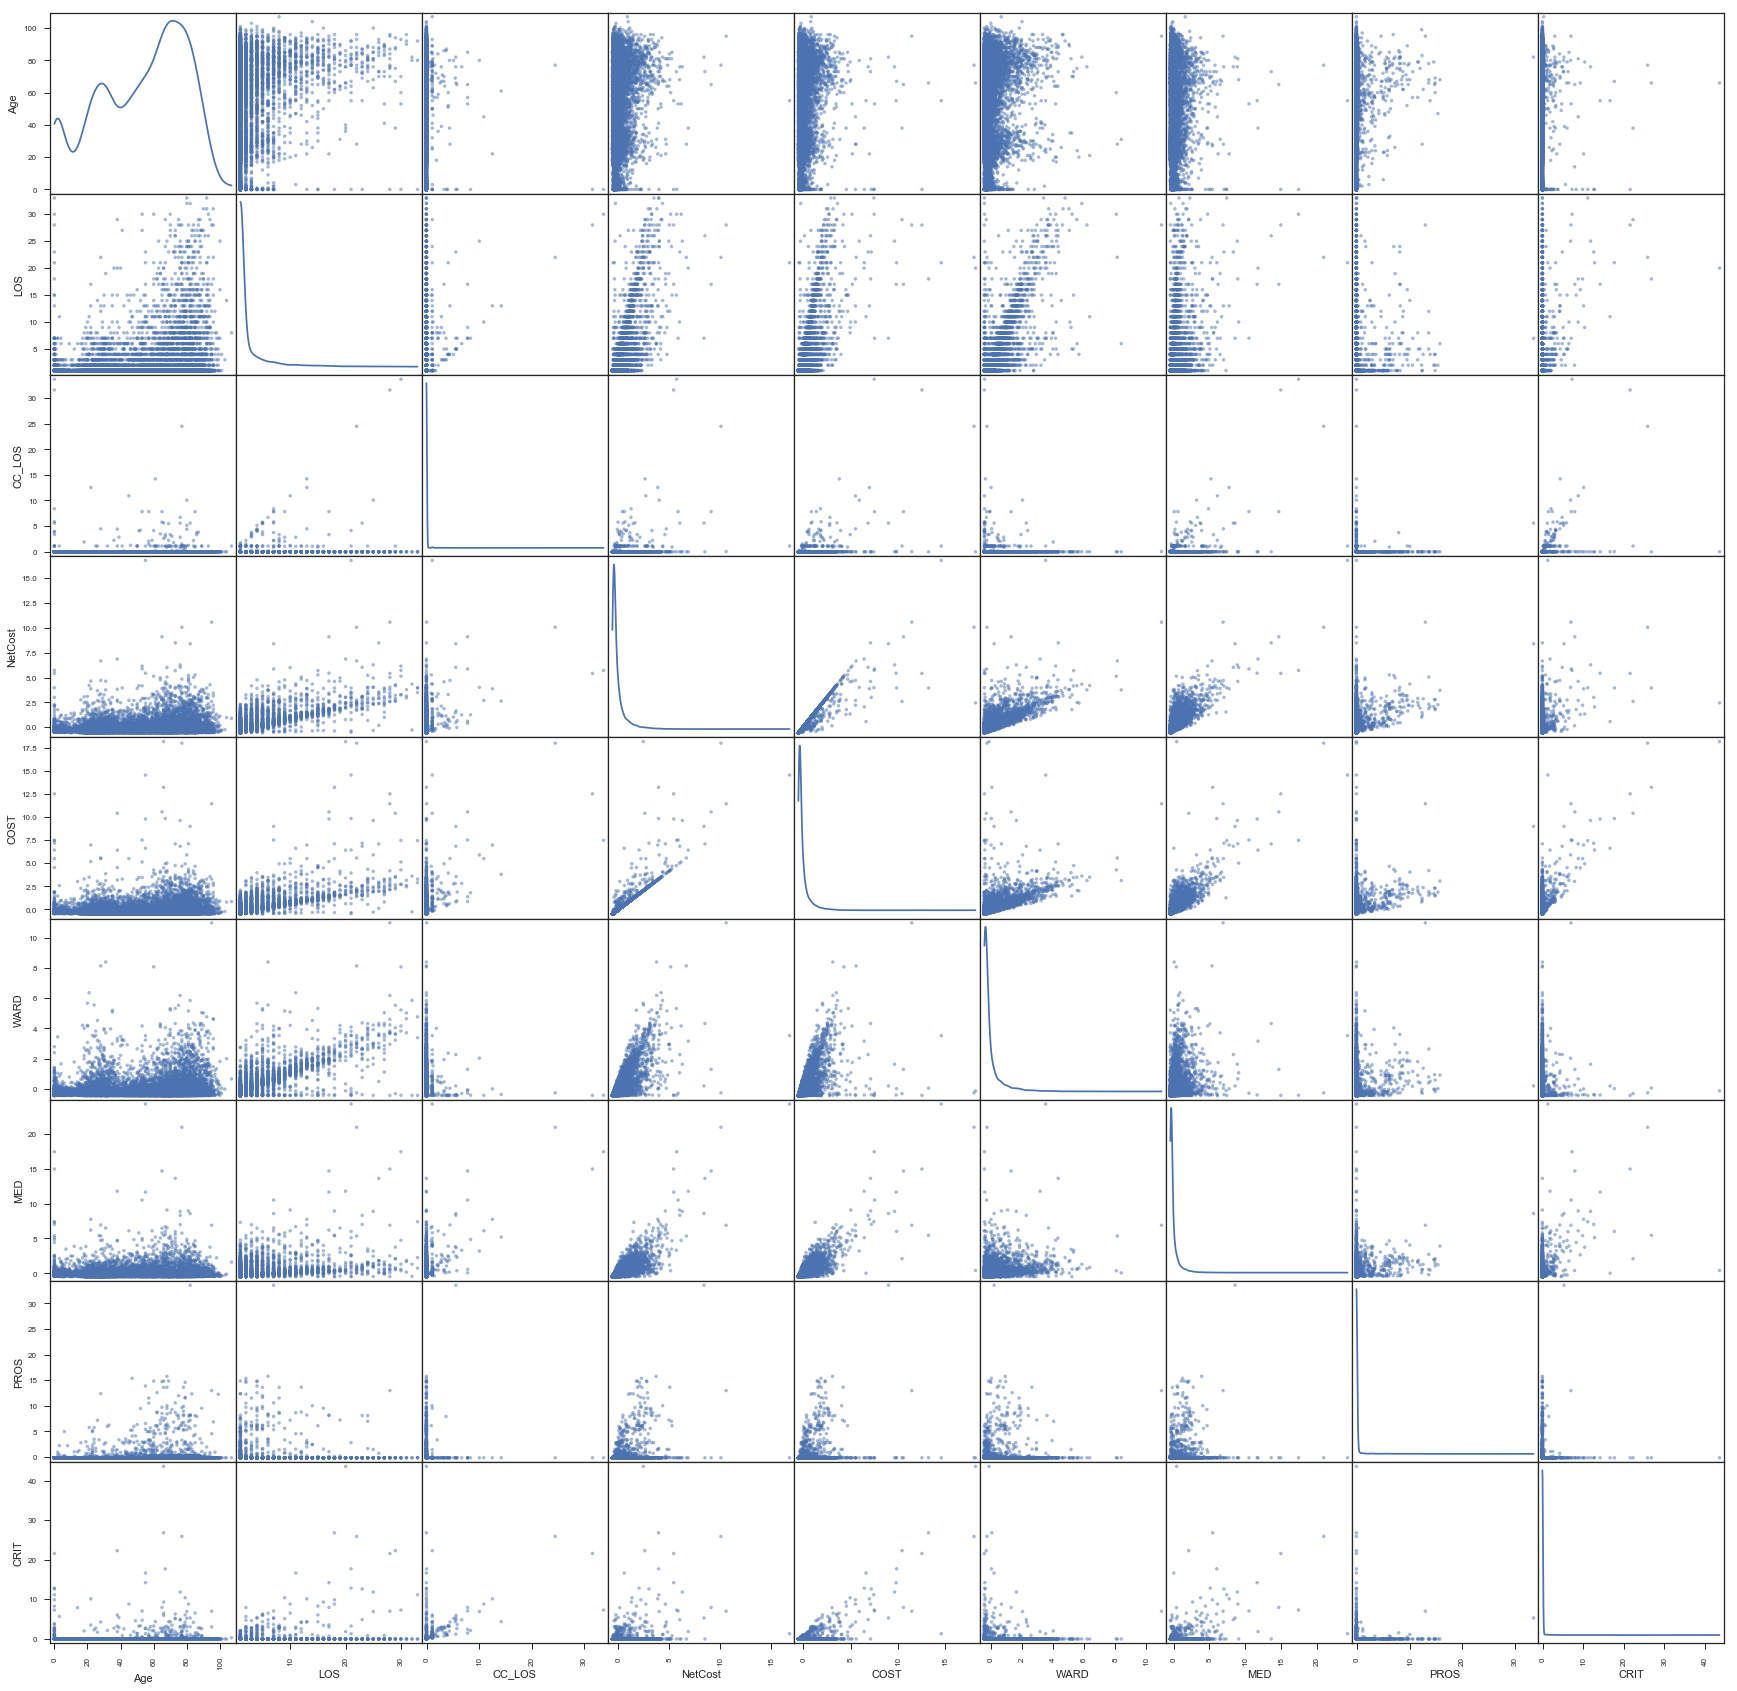

In [38]:
scatter_matrix(trimmed_df[desired],
               figsize=(30,30), diagonal='kde')
plt.show();

In [39]:
left_trim = scaled_df[abs(scaled_df.LOS - scaled_df.LOS.mean()) >= 5 * scaled_df.LOS.std()]

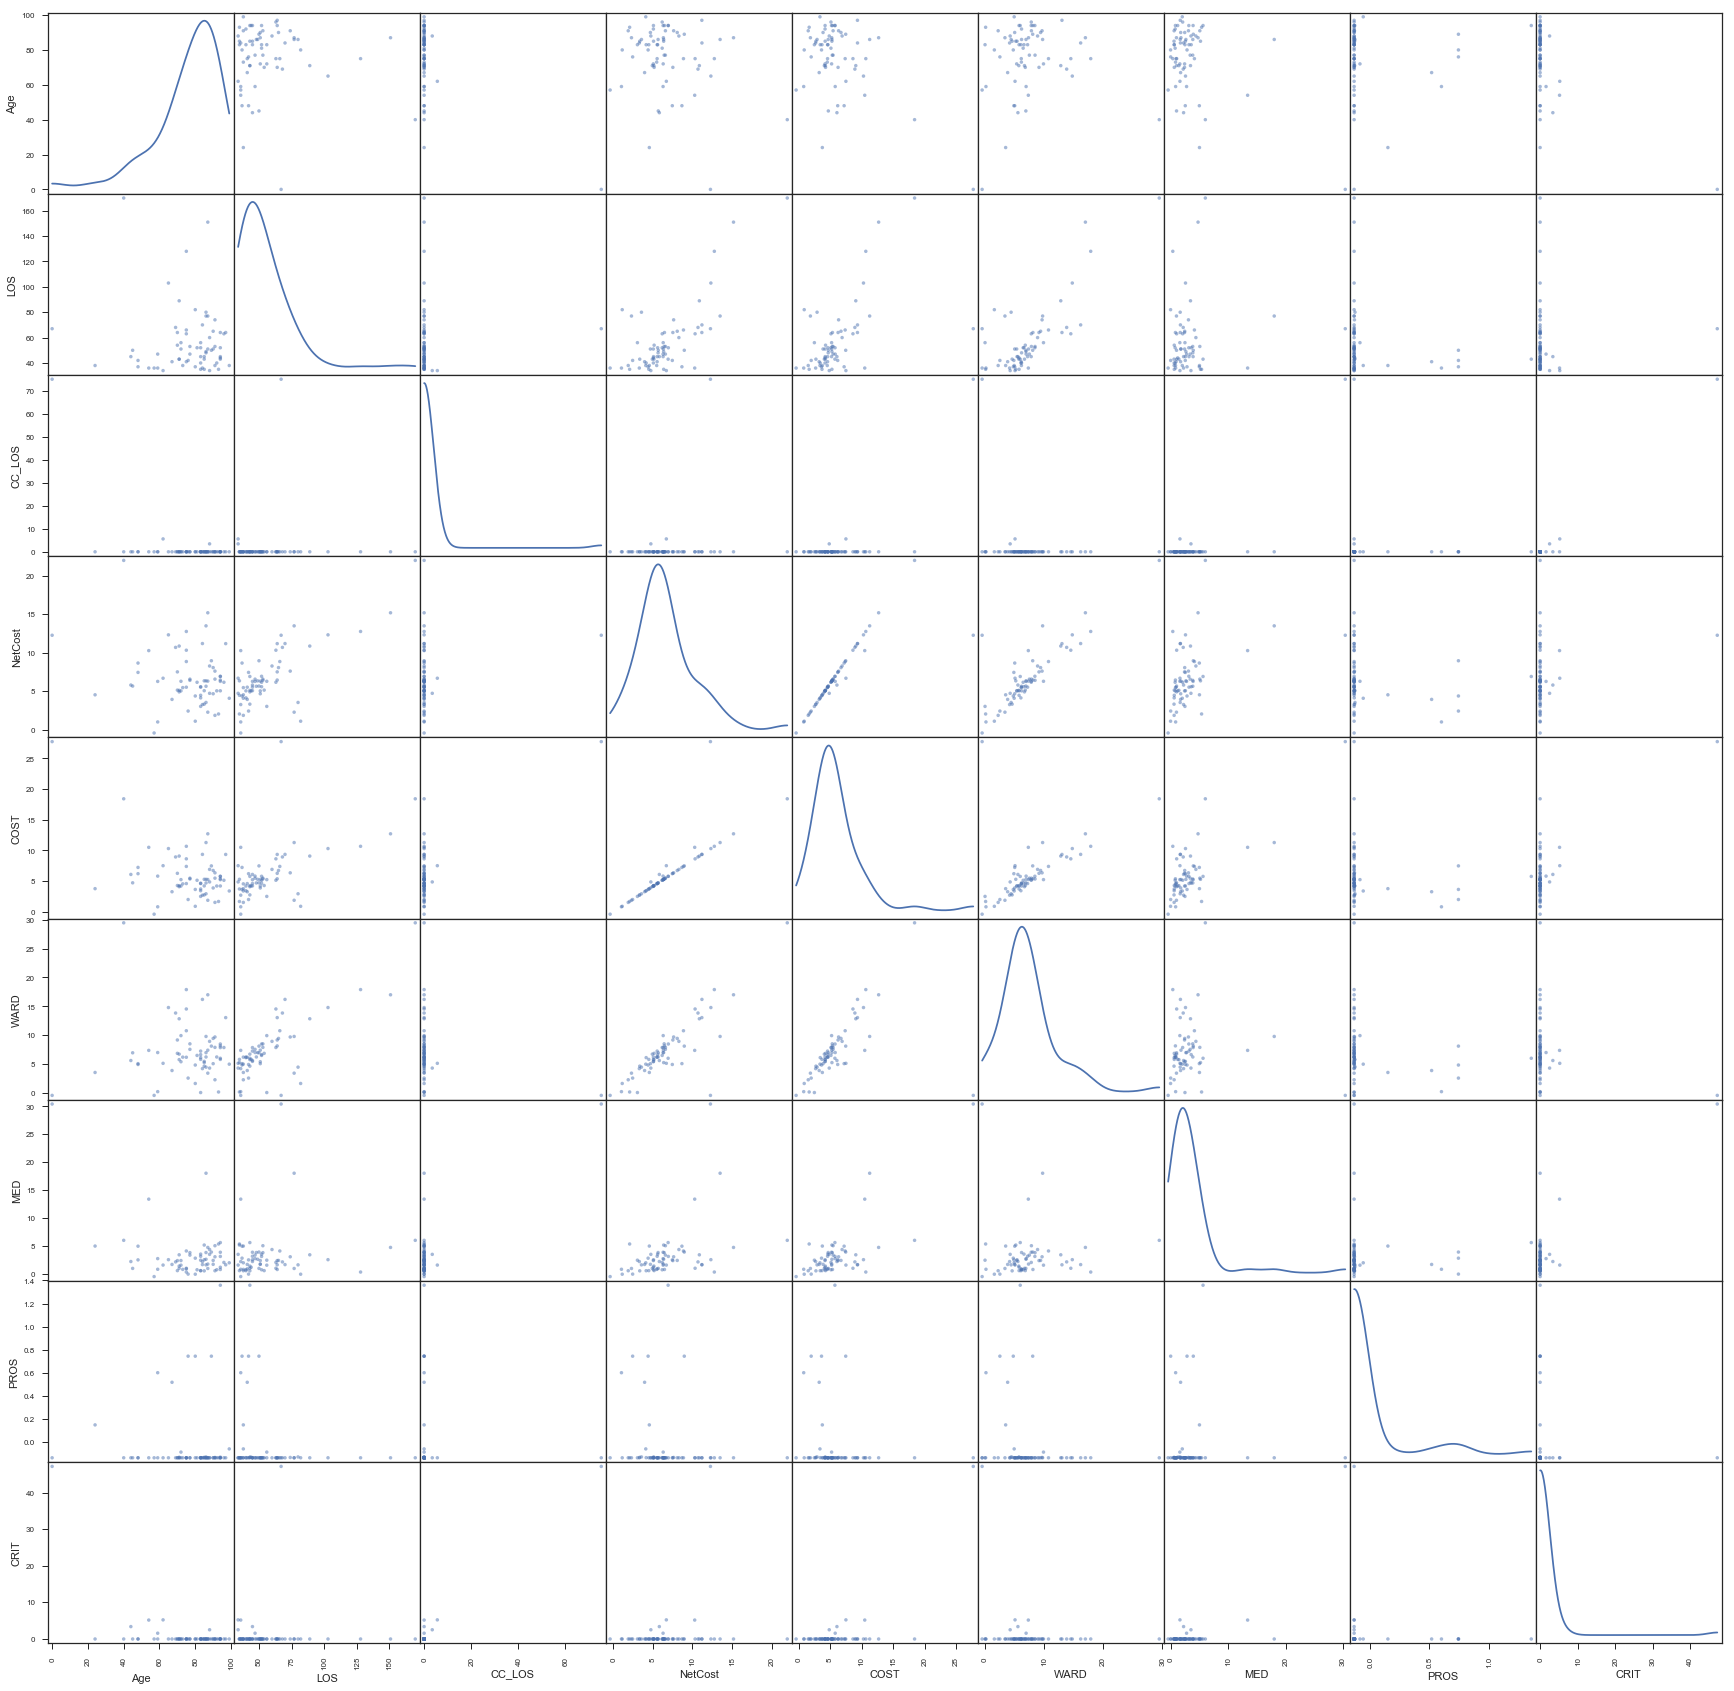

In [40]:
scatter_matrix(left_trim[desired],
               figsize=(30,30), diagonal='kde')
plt.show();

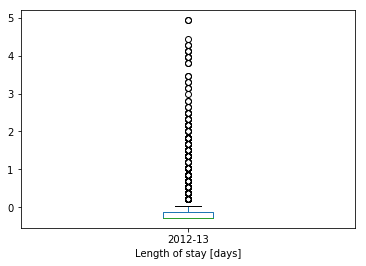

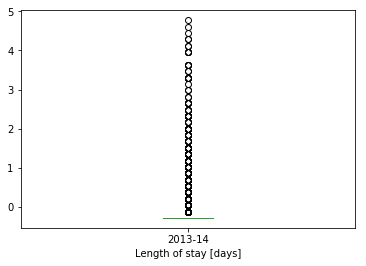

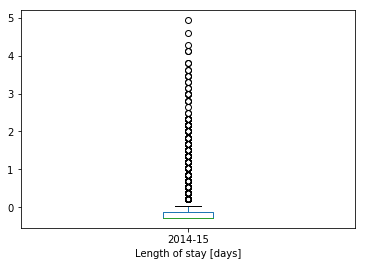

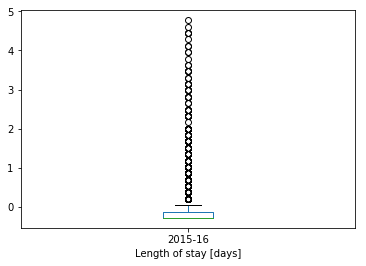

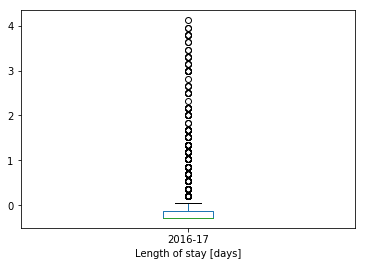

In [26]:
for title, group in trimmed_df.groupby('Bench_Period'):
    group.plot.box(y='LOS', label=title)
    plt.xlabel('Length of stay [days]');

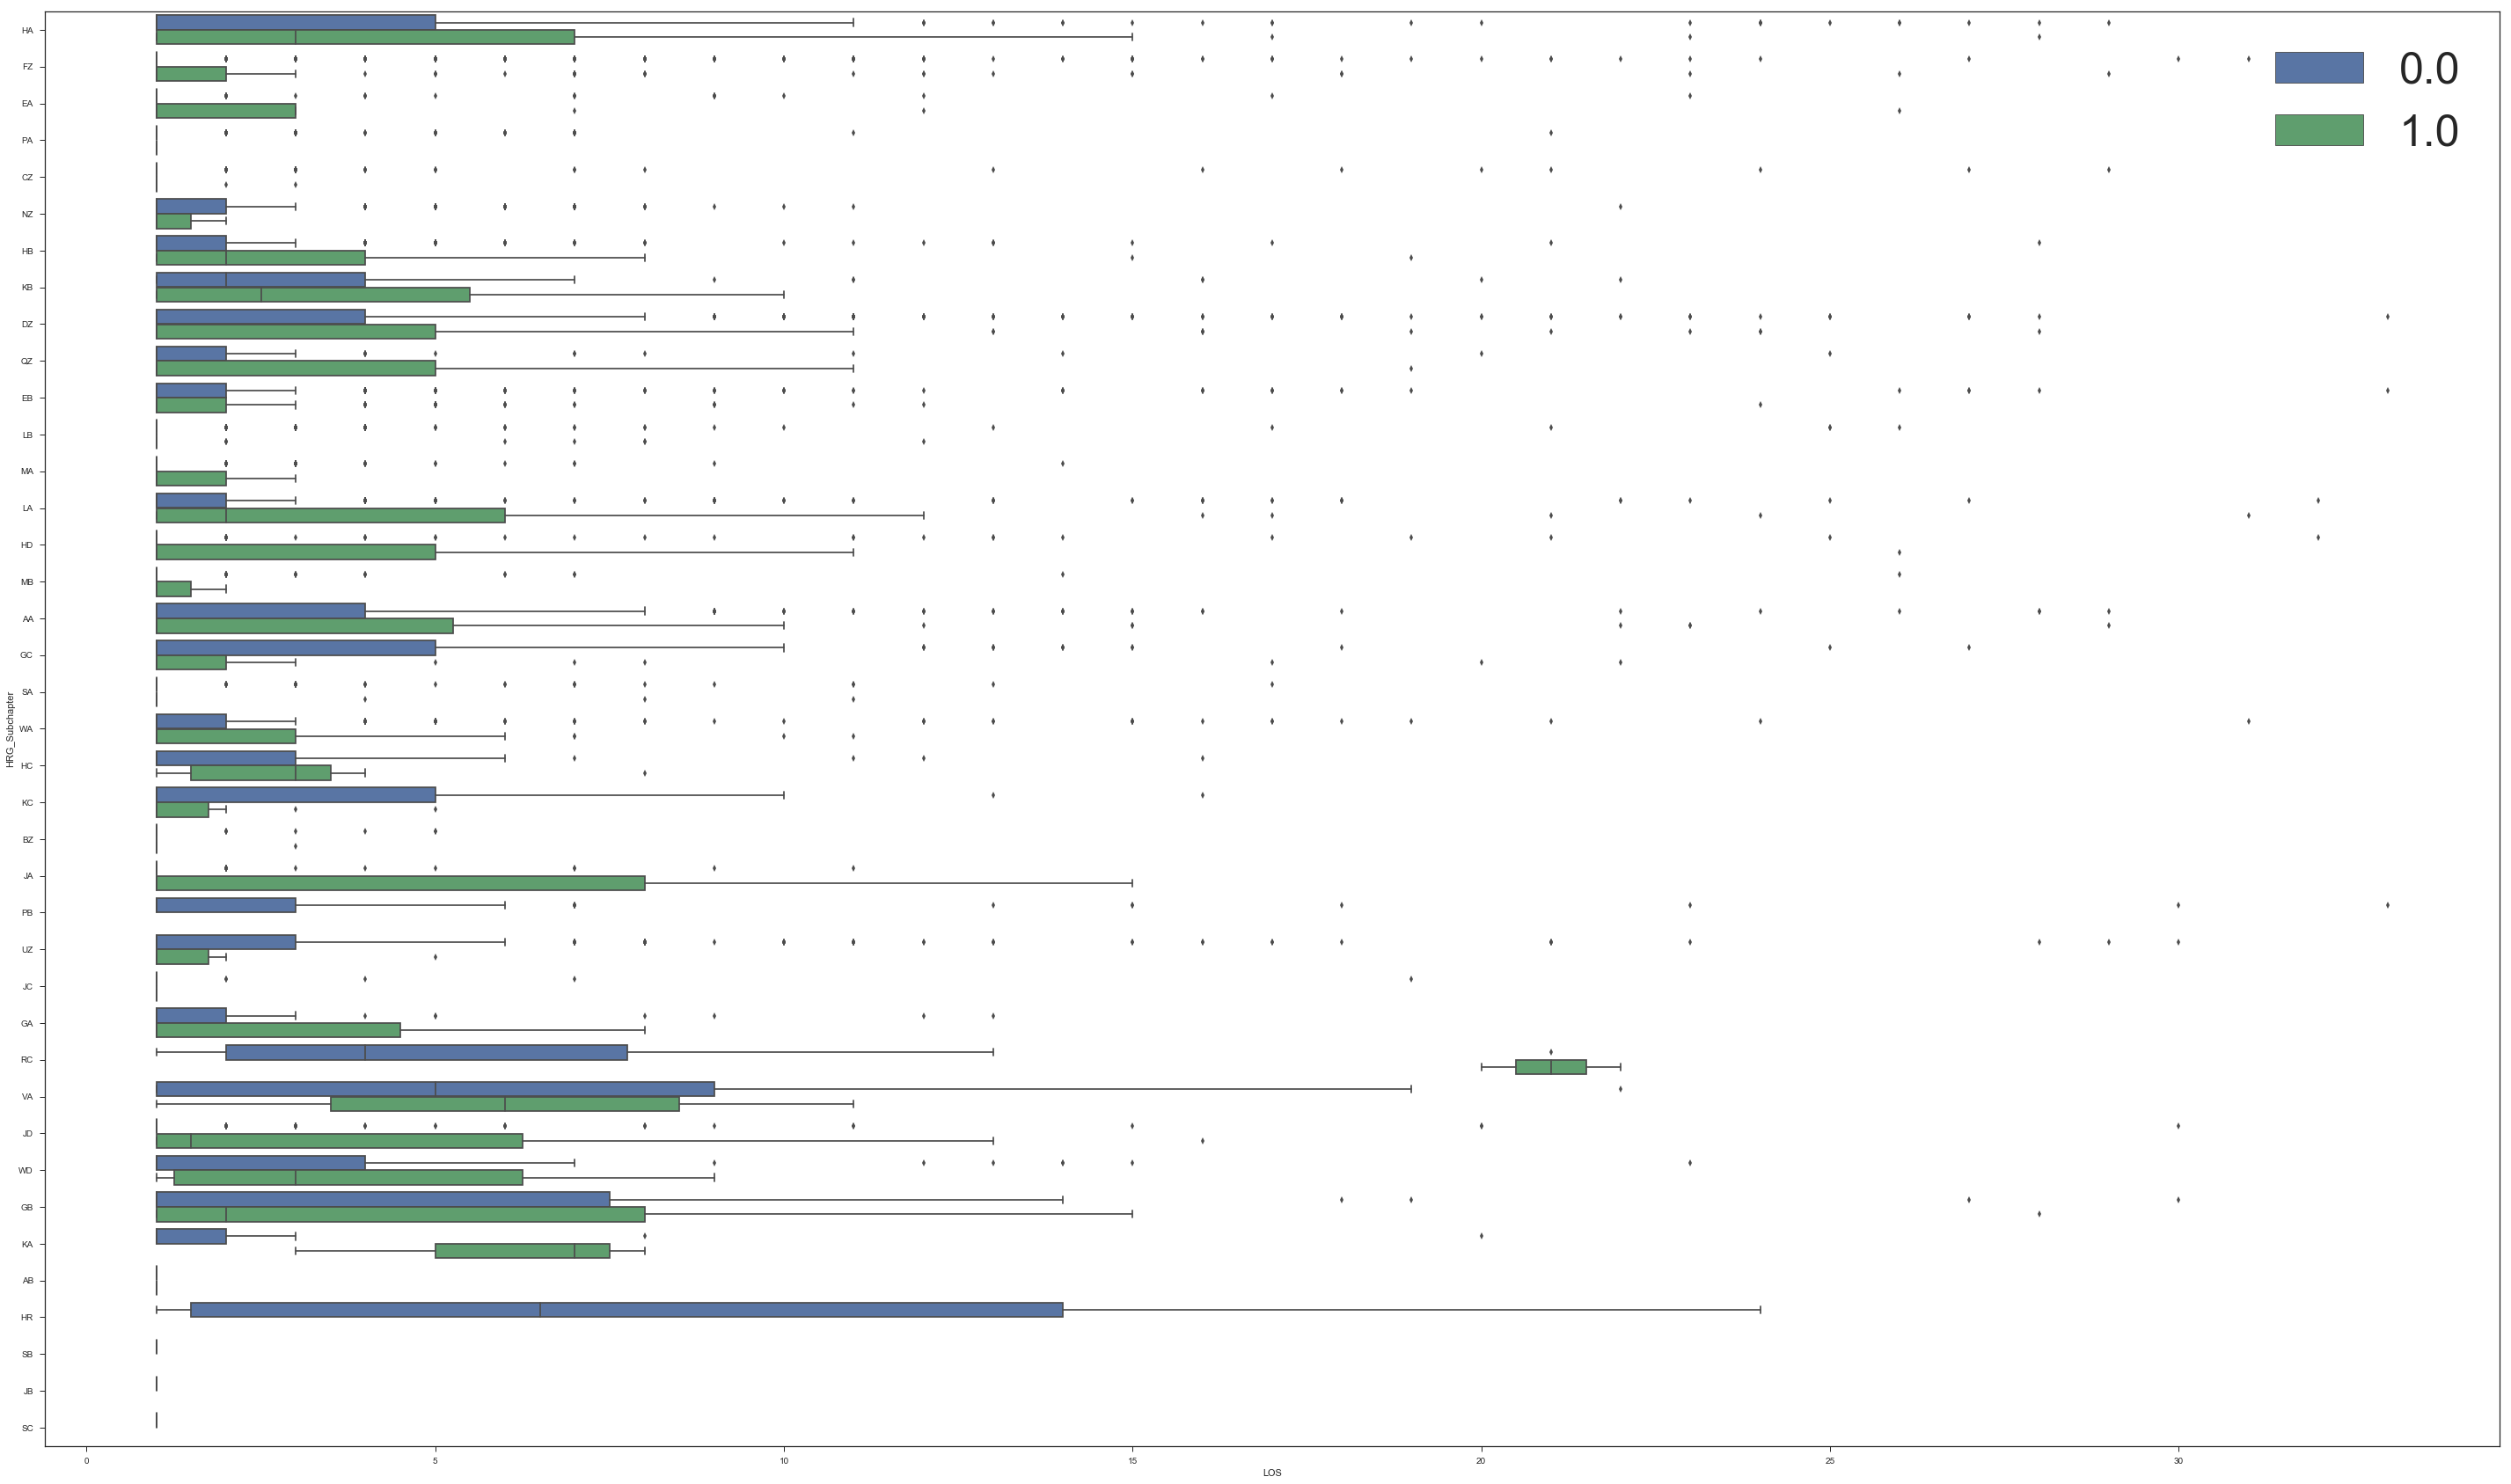

In [41]:
sns.set(style='ticks')

plt.figure(figsize=(200, 140))

f, ax = plt.subplots(figsize=(50,30))

sns.boxplot(data=trimmed_df, x='LOS', y='HRG_Subchapter', hue='DiabetesSec')
plt.legend(fontsize=50)
plt.savefig('LOS-HRG-DiabetesSec-boxplot.pdf');

# OLD STUFF

In [ ]:
sns.lmplot(data=df, x='LOS', y='NetCost',
           hue='south_north', col='SEX', scatter_kws={'s': 0.01});

In [ ]:
x = df['LOS']
y = df['NetCost']

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)

plt.scatter(x, y, marker='x', s=.1)
plt.plot(x, fit_fn(x), color='indianred')
plt.xlabel('LoS [days]')
plt.ylabel('NetCost [years]')
plt.savefig('LOS_NC.pdf', bbox_inches='tight');

In [ ]:
df[(df['Bench_Period'] == '2015-16') | (df['Bench_Period'] == '2016-17')]['SEX'].unique()

In [ ]:
male_data = df[df['SEX'] == 'M']
south_male_data = male_data[male_data['south_north'] == 'South']
north_male_data = male_data[male_data['south_north'] == 'North']

In [ ]:
sns.lmplot(data=df, x='LOS', y='NetCost',
           hue='Obese', col='SEX', scatter_kws={'s': 0.01});

In [ ]:
x1 = df['Age']
x2 = df['Age']

y1 = df['NetCost']
y2 = df['LOS']

plt.subplot(2, 1, 1)
plt.scatter(x1, y1, s=.1)
plt.xlabel('Age [years]')
plt.ylabel('NetCost [£]');

plt.subplot(2, 1, 2)
plt.scatter(x2, y2, s=.1)
plt.xlabel('Age [years]')
plt.ylabel('LoS [days]');

In [ ]:
pd.DataFrame(df.corr())

In [ ]:
df['OVH'].mean(), df['OVH'].std(), df['OVH'].var()